#**Long-Short Term Memory**

**What will you learn?**
1. **Problem with RNN** : Vanishing and Exploding Gradients
2. **Detection of problem**
3. **Solution to the problem** : GRU, LSTM
4. **GRU**
5. **LSTM**
6. **Implementation of LSTM**

##**Problem with RNN**

Recurrent Neural Networks suffer from short-term memory. If a sequence is long enough, they’ll have a hard time carrying information from earlier time steps to later ones. So if you are trying to process a paragraph of text to do predictions, RNN’s may leave out important information from the beginning.

This can be explained using the concept of exploding or vanishing gradients.

##**Vanishing or Exploding Gradients**

An error gradient is the direction and magnitude calculated during the training of a neural network that is used to update the network weights in the right direction and by the right amount.

In deep networks or recurrent neural networks, error gradients can accumulate during an update and result in very large gradients. These in turn result in large updates to the network weights, and in turn, an unstable network. At an extreme, the values of weights can become so large as to overflow and result in NaN values.

The **explosion** occurs through exponential growth by repeatedly multiplying gradients through the network layers that have values larger than 1.0.

Such gradients are called **Exploding Gradients.**


A problem with training networks with many layers (e.g. deep neural networks) is that the gradient diminishes dramatically as it is propagated backward through the network. The error may be so small by the time it reaches layers close to the input of the model that it may have very little effect. This **vanishing** of gradients occur through the network layers that have values lesser than 1.0.

Such gradients are called **Vanishing Gradients.**


##**How do You Know if You Have Exploding Gradients?**


There are some subtle signs that you may be suffering from exploding gradients during the training of your network, such as:

1. The model is unable to get traction on your training data (e.g. poor loss).
2. The model is unstable, resulting in large changes in loss from update to update.
3. The model loss goes to NaN during training.

##**How do You Know if You Have Vanishing Gradients?**

Vanishing Gradients can be detected from the kernel weights distribution. All you have to look for is whether the weights are dying down to 0.

If only 25% of your kernel weights are changing that does not imply a vanishing gradient, it might be a factor, but there can be a variety of reasons, such as poor data, loss function used to the optimizer, etc. Kernel's weight not changing only points out that the model is not learning well.

##**LSTM’s and GRU’s as a solution**

LSTM ’s and GRU’s were created as the solution to short-term memory. They have internal mechanisms called gates that can regulate the flow of information.


These gates can learn which data in a sequence is important to keep or throw away. By doing that, it can pass relevant information down the long chain of sequences to make predictions. Almost all state of the art results based on recurrent neural networks are achieved with these two networks. LSTM’s and GRU’s can be found in speech recognition, speech synthesis, and text generation. You can even use them to generate captions for videos.

###**Intuition**

Let’s start with a thought experiment. Let’s say you’re looking at reviews online to determine if you want to buy Life cereal (don’t ask me why). You’ll first read the review then determine if someone thought it was good or if it was bad.

When you read the review, your brain subconsciously only remembers important keywords. You pick up words like “amazing” and “perfectly balanced breakfast”. You don’t care much for words like “this”, “gave“, “all”, “should”, etc. If a friend asks you the next day what the review said, you probably wouldn’t remember it word for word. You might remember the main points though like “will definitely be buying again”. If you’re a lot like me, the other words will fade away from memory.

And that is essentially what an LSTM or GRU does. It can learn to keep only relevant information to make predictions, and forget non relevant data. In this case, the words you remembered made you judge that it was good.

##**GRU**

GRU basically says that we should be able to pass the output of the previous hidden layer as it is, without any change.

IMAGE

In the image above, we should have some way, to pass $a_{i - 1}$ without any changes as $a_i$. This should happen in some units only. So we need a way to decide for which units this needs to happen.

In standard RNN, the combined value of $x_i$ and $a_{i - 1}$ would give us the new $a_i$. But in GRU, the combinarion of this gives us a potential change, $a_i'$.

To decide whether to use $a_i$ or $a_i'$, we use the **Update Gate**. So basically the update gate helps the model to determine how much of the past information (from previous time steps) needs to be passed along to the future. To decide this, we use a combination of $a_{i - 1}$ and $x_i$ passed through the sigmoid function.

New potential value, 
$$a_i' = tanh(W_{aa}*(a_{i - 1}) + W_{xa}*(x_i) + b_1$$

and Update Gate,
$$u = \sigma(W_u'(a_{i-1}) + W_{u}x_i + b_2)$$

where $W_{aa}*, W_{xa}*, W_u', W_{u}$ are the weights and $b_1, b_2$ are the biases.

We are going to let our unit figure out some weights such that it does not have to use the new activation, it can pass the previous activation as it is. 

Hence, 

$$ a_i = u * a_i' + (1 - u)a_{i - 1}$$

$$ y_i = Activation(a_i) $$

###**Variation in GRU**

One variation in GRU is the usage of **Reset Gate**.

Essentially, this gate is used from the model to decide how much of the past information to forget. To calculate it, we use the same formula as update gate:

$$ r = \sigma(W_r'(a_{i-1}) + W_{r}x_i + b_r)$$

It is also referred to as **Forget Gate**.

Now, the equation of $a_i'$ can be re written as :

$$a_i' = tanh(W_{aa}*(a_{i - 1})*r + W_{xa}*(x_i) + b_1$$

In simpler words we may say that, the update gate decides how much impact $a_i'$ has on $a_i$, and the reset gate is used to decide how much impact will $a_{i-1}$ will have on $a_i'$.




##**LSTM**

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. 

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

###**Idea Behind LSTMs**



The key to LSTMs is the cell state, the horizontal line running through the top of the diagram.

The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.

The LSTM does have the ability to remove or add information to the cell state, carefully regulated by different gates.

The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the **Forget Gate** layer. It looks at $a_{t−1}$ and $x_t$, and outputs a number between 0 and 1 for each number in the cell state $C_{t−1}$. A 1 represents “completely keep this” while a 0 represents “completely get rid of this.”

$$ f = \sigma(W_f^x * X_t + W_f^a * a_{t - 1} + b_a)$$

The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the **Input Gate** layer decides which values we’ll update. Next, a tanh layer creates a vector of new potential values, $C_t'$, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

$$C_t' = tanh(W_C^X *X_t + W_c^a * a_{t-1} + b_c) $$

$$ i_t = \sigma(W_i^X*X_t + W_i^a*a_{t-1} + b_i) $$

It’s now time to update the old cell state, $C_{t−1}$, into the new cell state $C_t$. The previous steps already decided what to do, we just need to actually do it.

We multiply the old state by $f$, forgetting the things we decided to forget earlier. Then we add $i_t * C_t'$. This is the new candidate values, scaled by how much we decided to update each state value.

$$C_t = i_t * C_t' + f*C_{t-1}$$

Finally, we need to decide what we’re going to **output**. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through tanh (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

$$output = \sigma(W_o^x * X_t + W_o^a * a_{t-1} + b_o)$$ 

##**Implementation**

We implemented the RNN code for Airline Dataset and did not get good results. Let's apply LSTM to the same dataset and see if we can reach to a better output.

In [1]:
from pandas import read_csv 
import numpy as np

In [2]:
df = read_csv('https://files.codingninjas.in/international-airline-passengers-7703.csv', usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [4]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [6]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [7]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [16]:
model = Sequential()
model.add(LSTM(128, input_shape=(look_back, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size = 1)

Epoch 1/10
84/84 [==============================] - 2s 4ms/step - loss: 0.0521
Epoch 2/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0141
Epoch 3/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0212
Epoch 4/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 5/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0126
Epoch 6/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 7/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0166
Epoch 8/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 9/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 10/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0047


In [17]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

In [18]:
from matplotlib import pyplot as plt

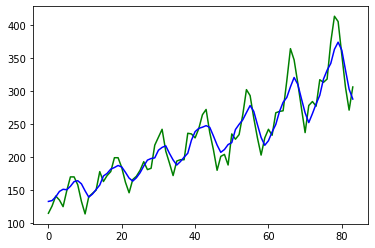

In [19]:
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

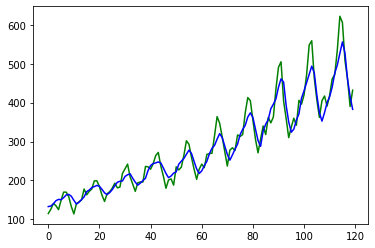

In [20]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()

In [23]:
from sklearn.metrics import r2_score
r2_score(combinedTrue, combinedPredicted)

0.9510215016761816

As compared to the score we got using RNN, this score is much better.